In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.stats import poisson
import datetime as dt
from unidecode import unidecode
from glob import glob
from game_log import load_current_line
plt.rcParams['figure.figsize'] = [13, 7]
pd.set_option("display.precision", 3)
pd.set_option('display.max_columns', 37)

In [85]:
games = pd.DataFrame()
for file in glob('game_logs/*'):
    print(file)
    df = pd.read_csv(file)
    games = pd.concat((games,df)).reset_index(drop=True)
games = games.drop_duplicates()

pp = pd.DataFrame()
for file in (glob('Lines/old_nba/*') + glob('Lines/pp/*')):
    df = pd.read_csv(file,index_col=0)
    df['date'] = pd.to_datetime(df['date'],utc=True)
    df['date'] = df['date'].dt.floor('d')
    pp = pd.concat((pp,df))
pp = pp.reset_index(drop=True)
pp['date'] = pp['date'].dt.floor('d')
pp = pp.sort_values(by='date')
pp = pp.groupby(['date','player','stat']).last().reset_index()

pp['date'] = pd.to_datetime(pp['date'],format='mixed')#.dt.floor('d').dt.date
games['date'] = pd.to_datetime(games['date']).dt.tz_localize('US/Central').dt.floor('d').dt.date
games = games.sort_values(by=['player','date'])
#games['shifted'] = games.groupby('player')['GS'].shift(1)
#rolling_mean = games.groupby('player')['shifted'].rolling(3).mean().reset_index(level=0, drop=True)
#games['start'] = rolling_mean
#games = games.drop('shifted',axis=1)
nba = pp.loc[pp.league_id == 7].reset_index()

game_logs\data_2010.csv
game_logs\data_2011.csv
game_logs\data_2012.csv
game_logs\data_2013.csv
game_logs\data_2014.csv
game_logs\data_2015.csv
game_logs\data_2016.csv
game_logs\data_2017.csv
game_logs\data_2018.csv
game_logs\data_2019.csv
game_logs\data_2020.csv
game_logs\data_2021.csv
game_logs\data_2022.csv
game_logs\data_2023.csv
game_logs\data_2024.csv
game_logs\pdata.csv


In [88]:
games.dtypes

player     object
G           int64
date       object
age        object
team       object
H/A         int64
opp        object
W/L         int64
GS          int64
MP        float64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
GmSc      float64
+/-       float64
pos        object
season    float64
KM          int64
series     object
G#        float64
dtype: object

In [86]:
comb = pp.merge(games,on=['player','date','opp'],how='inner')
print(len(comb))

ValueError: You are trying to merge on datetime64[ns, UTC] and object columns. If you wish to proceed you should use pd.concat

In [ ]:
games.loc[games.player=='Joel Embiid']

,player,G,date,age,team,H/A,opp,W/L,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,pos,season,KM,series,G#
185841,Joel Embiid,1,2016-10-26,22-224,PHI,1,OKC,-6,1,22.417,6,16,0.375,1,3,0.333,7,8,0.875,0,7,7,0,0,2,4,4,20,8.7,-6.0,C,2017.0,15,NaN,NaN
185842,Joel Embiid,2,2016-10-29,22-227,PHI,1,ATL,-32,1,15.467,5,9,0.556,1,1,1.000,3,4,0.750,0,2,2,1,1,2,3,3,14,8.8,-3.0,C,2017.0,15,NaN,NaN
185843,Joel Embiid,3,2016-11-01,22-230,PHI,1,ORL,-2,1,24.867,6,12,0.500,0,1,0.000,6,9,0.667,3,7,10,3,0,4,4,2,18,15.1,5.0,C,2017.0,15,NaN,NaN
185844,Joel Embiid,4,2016-11-05,22-234,PHI,1,CLE,-1,1,25.250,7,13,0.538,4,4,1.000,4,4,1.000,2,4,6,2,1,4,6,3,22,16.3,-11.0,C,2017.0,15,NaN,NaN
185845,Joel Embiid,5,2016-11-07,22-236,PHI,1,UTA,-25,1,19.200,4,8,0.500,0,0,NaN,6,9,0.667,4,5,9,0,1,1,5,5,14,7.8,-7.0,C,2017.0,15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352469,Joel Embiid,12,2023-11-17,29-246,PHI,0,ATL,10,1,36.550,10,19,0.526,1,3,0.333,11,11,1.000,2,5,7,8,2,0,4,3,32,28.0,16.0,C,2024.0,15,NaN,NaN
352470,Joel Embiid,13,2023-11-19,29-248,PHI,0,BKN,22,1,31.233,11,24,0.458,1,2,0.500,9,10,0.900,2,10,12,9,0,1,1,3,32,28.4,25.0,C,2024.0,15,NaN,NaN
352471,Joel Embiid,14,2023-11-21,29-250,PHI,1,CLE,-3,1,41.033,9,21,0.429,1,3,0.333,13,16,0.813,3,10,13,5,2,5,6,6,32,25.4,3.0,C,2024.0,15,NaN,NaN
352472,Joel Embiid,15,2023-11-25,29-254,PHI,0,OKC,4,1,37.367,8,18,0.444,0,4,0.000,19,21,0.905,4,7,11,9,1,4,4,5,35,33.8,7.0,C,2024.0,15,NaN,NaN


In [ ]:
def calc_outcome(row):
    outcome = 0
    for part in row['stat'].split('+'):
        try:
            outcome += row[part]
        except KeyError:
            return float('nan')
    return outcome

comb = pp.merge(games,on=['player','date','opp'])
comb['result'] = comb.apply(lambda row: calc_outcome(row),axis=1)
comb['o_u'] = ['under' if x > y else 'over' if x < y else 'push' for x, y in zip(comb['line'], comb['result'])]

In [ ]:
comb.loc[(comb.stat=='PTS+TRB+AST')][['player','date','stat','line','result','o_u','PTS','AST','TRB']].sample(20)

,player,date,stat,line,result,o_u,PTS,AST,TRB
3091,Spencer Dinwiddie,2023-03-05,PTS+TRB+AST,29.5,40.0,over,24,8,8
11169,Malik Monk,2023-04-05,PTS+TRB+AST,18.5,22.0,over,13,4,5
8259,Tre Jones,2023-03-24,PTS+TRB+AST,21.5,24.0,over,10,12,2
8803,Julius Randle,2023-03-27,PTS+TRB+AST,39.5,33.0,under,26,3,4
14856,Buddy Hield,2023-11-03,PTS+TRB+AST,17.5,21.0,over,14,2,5
788,Jaylen Brown,2023-02-23,PTS+TRB+AST,34.5,44.0,over,30,3,11
10808,Jalen Green,2023-04-04,PTS+TRB+AST,29.5,42.0,over,32,4,6
7789,Shai Gilgeous-Alexander,2023-03-23,PTS+TRB+AST,41.5,37.0,under,30,3,4
8783,Jaden Ivey,2023-03-27,PTS+TRB+AST,27.5,48.0,over,32,8,8
4507,Jayson Tatum,2023-03-11,PTS+TRB+AST,44.5,55.0,over,34,6,15


In [ ]:
display(comb['o_u'].value_counts())

o_u
under    7532
over     7145
push      316
Name: count, dtype: int64

In [ ]:
display(comb.loc[comb.GS<0.5]['o_u'].value_counts())
display(comb.loc[(comb.GS<0.5) & (comb.stat.str.contains('PTS'))]['o_u'].value_counts())

o_u
under    429
over     372
push       7
Name: count, dtype: int64

o_u
under    259
over     185
push       1
Name: count, dtype: int64

In [ ]:
#potential edge:
#bench players go under all the time, mostly on pts
today = load_current_line('Lines\pp\pp_2023_11_29.csv','scrape_time','scrape_time')
today = today.loc[today.league_id==7]

In [ ]:
recent = games.groupby('player').last().reset_index()

In [ ]:
bench = recent.loc[recent.GS < 0.5]['player']

In [ ]:
bench_lines = today.merge(bench,on='player').sort_values(by='stat')

In [ ]:
def add_avg(df,stat,window):
    df[f'{stat}_avg'] = df.groupby('player')[stat].shift(1).rolling(3).mean()
    return df
add_avg(games,'AST',3)
games

,player,G,date,age,team,H/A,opp,W/L,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,pos,season,KM,series,G#,AST_avg
323786,A.J. Green,1,2022-10-22,23-025,MIL,1,HOU,20,0,2.233,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,1,0,0,0,0,0,0.7,-2.0,SG,2023.0,15,NaN,NaN,NaN
323787,A.J. Green,2,2022-11-16,23-050,MIL,1,CLE,15,0,15.250,1,4,0.250,1,4,0.25,0,0,NaN,1,2,3,0,1,0,0,2,3,2.1,-11.0,SG,2023.0,15,NaN,NaN,NaN
323788,A.J. Green,3,2022-11-21,23-055,MIL,1,POR,8,0,0.650,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0.0,-5.0,SG,2023.0,15,NaN,NaN,NaN
323789,A.J. Green,4,2022-11-25,23-059,MIL,1,CLE,15,0,3.050,0,0,NaN,0,0,NaN,0,0,NaN,0,1,1,0,0,0,0,1,0,-0.1,-7.0,SG,2023.0,15,NaN,NaN,0.333
323790,A.J. Green,5,2022-11-27,23-061,MIL,1,DAL,9,0,1.967,0,1,0.000,0,1,0.00,0,0,NaN,0,0,0,0,0,0,0,1,0,-1.1,-5.0,SG,2023.0,15,NaN,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274689,Zylan Cheatham,1,2019-11-16,23-364,NOP,0,MIA,-15,0,13.867,1,3,0.333,0,0,NaN,0,0,NaN,0,3,3,1,0,0,1,3,2,-0.3,-17.0,PF,2020.0,15,NaN,NaN,NaN
274690,Zylan Cheatham,2,2019-11-17,24-000,NOP,1,GSW,8,0,5.867,0,1,0.000,0,1,0.00,0,0,NaN,0,0,0,0,0,0,0,0,0,-0.7,-6.0,PF,2020.0,15,NaN,NaN,NaN
274691,Zylan Cheatham,3,2020-01-13,24-057,NOP,0,DET,7,0,10.933,1,1,1.000,0,0,NaN,0,0,NaN,1,2,3,1,0,1,2,2,2,1.6,-7.0,PF,2020.0,15,NaN,NaN,NaN
274692,Zylan Cheatham,4,2020-08-13,24-270,NOP,0,ORL,-6,0,20.367,4,4,1.000,0,0,NaN,0,0,NaN,2,1,3,1,1,0,1,5,8,7.2,2.0,PF,2020.0,15,NaN,NaN,0.667


In [ ]:
def round_to_bucket(value, bucket_size):
    if bucket_size < 1:
        return value
    else:
        return ((value + bucket_size - 1) // bucket_size) * bucket_size
round_to_bucket(5,3)

6

STL
overall over %: 0.5396825396825397
result_df['count'].sum()=252


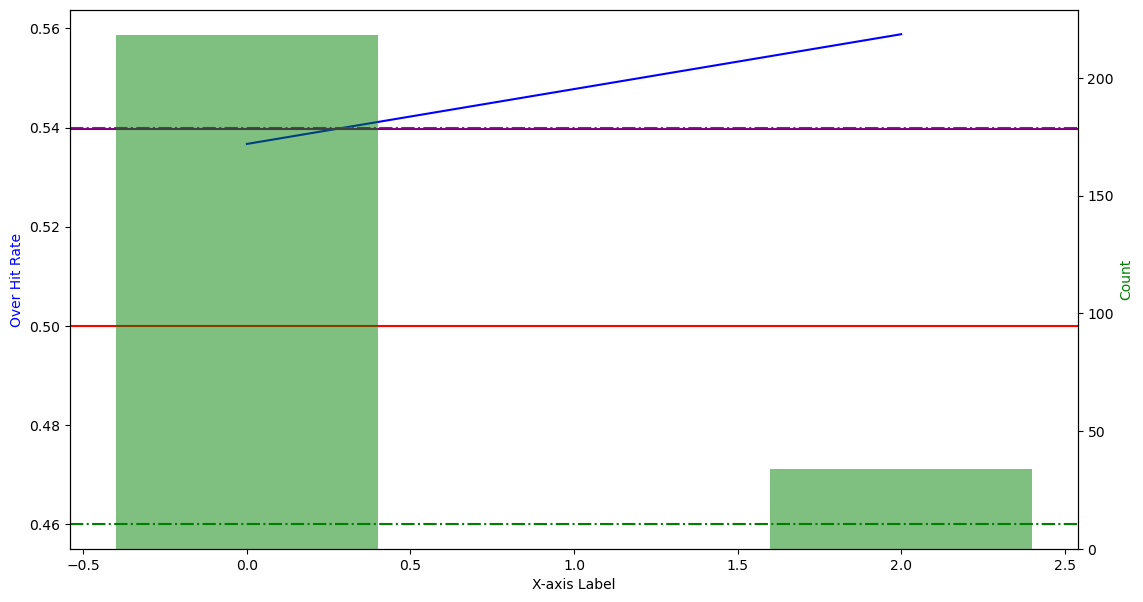

,stat_hist,o_u,count
0,0.0,over,117
1,0.0,under,101
2,2.0,over,19
3,2.0,under,15


In [ ]:
def graph_history(df,stat,bucket):
    df['stat_hist'] = df['line'].apply(lambda x: round_to_bucket(x,bucket))
    print(stat)
    x = df.loc[df.stat == stat].groupby('stat_hist')['o_u'].value_counts().reset_index().copy(deep=True)
    pivot_df = x.pivot(index='stat_hist', columns='o_u', values='count').fillna(0)
    if 'push' in pivot_df.columns:
        pivot_df['push'].fillna(0,inplace=True)
    else:
        pivot_df['push'] = 0

    if 'over' in pivot_df.columns:
        pivot_df['over'].fillna(0,inplace=True)
    else:
        pivot_df['over'] = 0

    if 'under' in pivot_df.columns:
        pivot_df['under'].fillna(0,inplace=True)
    else:
        pivot_df['under'] = 0

    pivot_df['over_ratio'] =(pivot_df['over'])/ (pivot_df['under'] + pivot_df['over'])
    pivot_df['count'] = pivot_df['over'] + pivot_df['under'] + pivot_df['push']
    result_df = pivot_df.reset_index()
    over_percent = result_df['over'].sum() / (result_df['under'].sum() + result_df['over'].sum())
    print('overall over %:',over_percent)
    print(f"{result_df['count'].sum()=}")
    fig, ax1 = plt.subplots()
    ax1.plot(result_df['stat_hist'], result_df['over_ratio'], label='Over Ratio', color='blue')
    ax1.set_xlabel('X-axis Label')
    ax1.set_ylabel('Over Hit Rate', color='blue')

    # Create a second y-axis (right)
    ax2 = ax1.twinx()

    # Plotting the second set of data against the second y-axis (right)
    ax2.bar(result_df['stat_hist'], result_df['count'], label='Count', color='green', alpha=0.5)
    ax2.set_ylabel('Count', color='green')

    # Adding a horizontal line at y = 0.5
    ax1.axhline(y=0.5, color='red', linestyle='-')
    ax1.axhline(y=0.46, color='green', linestyle='-.')
    ax1.axhline(y=0.54, color='green', linestyle='-.')
    ax1.axhline(y=over_percent, color='purple', linestyle='-')
    # Show plot
    plt.show()
    display(x)
    return

stat = 'STL'
bucket = 2

comb['stat_hist'] = comb['line'].apply(lambda x: round_to_bucket(x,bucket))

graph_history(comb,stat,bucket)

In [ ]:
comb.columns

Index(['date', 'player', 'stat', 'opp', 'line', 'id', 'league_id', 'time',
       'league', 'scrape_time', 'event_time', 'prop_id', 'team_x',
       'league_name', 'pp_player_id', 'G', 'age', 'team_y', 'H/A', 'W/L', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-',
       'pos', 'season', 'KM', 'series', 'G#', 'result', 'o_u', 'stat_hist'],
      dtype='object')

FT
0     166958
2      57815
1      47519
3      28057
4      22791
5      13142
6       9503
7       5865
8       4004
9       2550
10      1702
11      1103
12       684
13       424
14       321
15       186
16       125
17        85
18        49
19        23
21        12
20         8
22         4
24         3
23         2
26         1
25         1
Name: count, dtype: int64

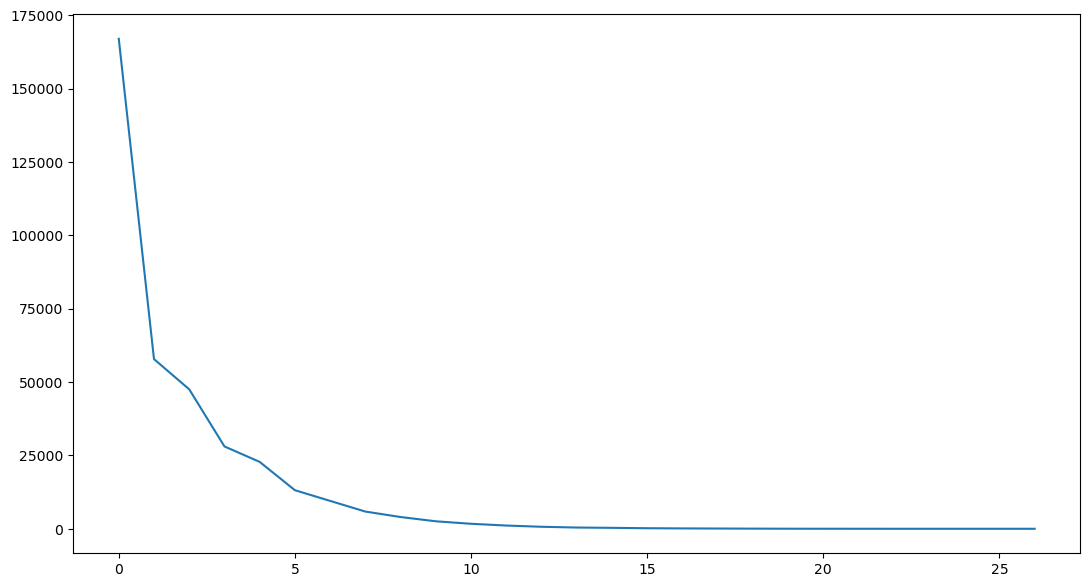

In [ ]:
plt.plot(games['FT'].value_counts())

In [ ]:
x = comb.groupby(['stat'])['o_u'].value_counts().reset_index()
piv = x.pivot(index=['stat'], columns='o_u', values='count').fillna(0).reset_index()
piv['hit_rate'] = (piv['over'] + 20) /( piv['under'] + piv['over'] + 40)
piv = piv.loc[piv.over > 20]
piv.sort_values(by=['hit_rate'])

o_u,stat,over,push,under,hit_rate
10,FT,487.0,22.0,554.0,0.469
13,PTS,954.0,4.0,1075.0,0.471
21,TRB+AST,625.0,24.0,696.0,0.474
9,FGA,52.0,5.0,56.0,0.486
16,PTS+TRB+AST,871.0,5.0,913.0,0.488
14,PTS+AST,952.0,3.0,997.0,0.489
20,TRB,785.0,121.0,822.0,0.489
3,BLK,72.0,0.0,76.0,0.489
15,PTS+TRB,1028.0,3.0,1070.0,0.490
0,3P,228.0,1.0,229.0,0.499


In [ ]:
pp.stat.value_counts()

stat
PTS                                      6358
PTS+TRB+AST                              4282
TRB                                      4038
PTS+TRB                                  3988
PTS+AST                                  3674
                                         ... 
Shots On Goal + Strikeouts                  1
Total Bases + Passing TDs                   1
Shots On Goal + FG Made                     1
Shots On Goal (NHL) + Turnovers (NBA)       1
Sacks + FG Made                             1
Name: count, Length: 197, dtype: int64

In [ ]:
drb = pp.loc[(pp.stat == 'DRB')].reset_index(drop=True).copy(deep=True).sort_values(by='date')
drb.head(15)

,date,player,stat,opp,line,id,league_id,time,league,scrape_time,event_time,prop_id,team,league_name,pp_player_id
0,2023-06-01,Bam Adebayo,DRB,DEN,6.5,None,7.0,None,NaN,None,None,None,None,None,NaN
1,2023-06-01,Bruce Brown,DRB,MIA,3.5,None,7.0,None,NaN,None,None,None,None,None,NaN
2,2023-06-01,Caleb Martin,DRB,DEN,5.5,None,7.0,None,NaN,None,None,None,None,None,NaN
3,2023-06-01,Jamal Murray,DRB,MIA,4.5,None,7.0,None,NaN,None,None,None,None,None,NaN
4,2023-06-01,Jimmy Butler,DRB,DEN,5.0,None,7.0,None,NaN,None,None,None,None,None,NaN
5,2023-06-01,Kentavious Caldwell-Pope,DRB,MIA,2.5,None,7.0,None,NaN,None,None,None,None,None,NaN
6,2023-06-01,Max Strus,DRB,DEN,2.5,None,7.0,None,NaN,None,None,None,None,None,NaN
7,2023-06-01,Nikola Jokic,DRB,MIA,10.5,None,7.0,None,NaN,None,None,None,None,None,NaN
13,2023-06-04,Nikola Jokic,DRB,MIA,9.5,None,7.0,None,NaN,None,None,None,None,None,NaN
12,2023-06-04,Max Strus,DRB,DEN,2.5,None,7.0,None,NaN,None,None,None,None,None,NaN


In [ ]:
drb.loc[(drb.player=='LeBron James')]

,date,player,stat,opp,line,id,league_id,time,league,scrape_time,event_time,prop_id,team,league_name,pp_player_id
33,2023-10-27,LeBron James,DRB,PHX,6.0,None,NaN,None,7.0,2023-10-26 15:43:00-05:00,2023-10-26 21:10:00-05:00,562672aa-f,None,None,NaN
57,2023-11-02,LeBron James,DRB,LAC,6.5,None,7.0,None,NaN,2023-11-01 15:50:00-05:00,2023-11-01 21:10:00-05:00,e9e6d376-c,LAL,NBA,58309.0
146,2023-11-30,LeBron James,DRB,DET,6.5,None,7.0,None,NaN,2023-11-29 13:02:00-06:00,2023-11-29 18:00:00-06:00,beae1deb-7,LAL,NBA,58309.0


In [ ]:
games.loc[games.player=='LeBron James'].tail(15)

,player,G,date,age,team,H/A,opp,W/L,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,pos,season,KM,series,G#,AST_avg
353358,LeBron James,4,2023-10-30,38-304,LAL,1,ORL,3,1,32.783,7,17,0.412,2,6,0.333,3,4,0.750,0,3,3,4,3,1,5,0,19,11.9,5.0,PF,2024.0,15,NaN,NaN,7.333
353359,LeBron James,5,2023-11-01,38-306,LAL,1,LAC,5,1,42.483,13,19,0.684,4,8,0.500,5,10,0.500,0,12,12,7,1,2,4,3,35,30.6,6.0,PF,2024.0,15,NaN,NaN,7.000
353360,LeBron James,6,2023-11-04,38-309,LAL,0,ORL,-19,1,35.217,8,15,0.533,2,5,0.400,6,7,0.857,1,8,9,5,3,0,3,1,24,22.5,12.0,PF,2024.0,15,NaN,NaN,6.333
353361,LeBron James,7,2023-11-06,38-311,LAL,0,MIA,-1,1,37.400,13,23,0.565,0,4,0.000,4,4,1.000,0,4,4,3,1,3,5,4,30,18.9,6.0,PF,2024.0,15,NaN,NaN,5.333
353362,LeBron James,8,2023-11-08,38-313,LAL,0,HOU,-34,1,27.200,7,13,0.538,0,2,0.000,4,5,0.800,1,5,6,2,0,0,3,1,18,11.5,-24.0,PF,2024.0,15,NaN,NaN,5.000
353363,LeBron James,9,2023-11-10,38-315,LAL,0,PHX,3,1,36.383,11,17,0.647,3,4,0.750,7,11,0.636,1,10,11,6,1,1,4,1,32,28.1,2.0,PF,2024.0,15,NaN,NaN,3.333
353364,LeBron James,10,2023-11-14,38-319,LAL,1,MEM,27,1,22.650,6,11,0.545,3,6,0.500,1,2,0.500,0,9,9,6,1,0,4,1,16,13.8,15.0,PF,2024.0,15,NaN,NaN,3.667
353365,LeBron James,11,2023-11-15,38-320,LAL,1,SAC,-15,1,35.300,9,15,0.600,3,7,0.429,7,8,0.875,2,8,10,12,4,1,6,1,28,31.2,0.0,PF,2024.0,15,NaN,NaN,4.667
353366,LeBron James,12,2023-11-17,38-322,LAL,0,POR,12,1,34.533,13,22,0.591,5,9,0.556,4,6,0.667,0,5,5,9,2,0,3,3,35,29.6,18.0,PF,2024.0,15,NaN,NaN,8.000
353367,LeBron James,13,2023-11-19,38-324,LAL,1,HOU,1,1,39.583,14,19,0.737,2,5,0.400,7,9,0.778,1,5,6,8,3,0,2,0,37,37.3,2.0,PF,2024.0,15,NaN,NaN,9.000


In [ ]:
x = drb.merge(games,on=['player','date'])
len(x.loc[~x.stat.isna()])

36

In [ ]:
x.loc[x.player=='Joel Embiid']

,date,player,stat,opp_x,line,id,league_id,time,league,scrape_time,event_time,prop_id,team_x,league_name,pp_player_id,G,age,team_y,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,pos,season,KM,series,G#,AST_avg
0,2023-10-26,Joel Embiid,DRB,MIL,8.0,None,NaN,None,7.0,2023-10-26 15:43:00-05:00,2023-10-26 18:40:00-05:00,c529b081-b,None,None,NaN,1,29-224,PHI,...,0.375,0,7,7,6,0,1,7,5,24,8.9,-1.0,C,2024.0,15,NaN,NaN,4.0
20,2023-11-02,Joel Embiid,DRB,TOR,9.0,None,7.0,None,NaN,2023-11-02 16:33:00-05:00,2023-11-02 18:10:00-05:00,306ef314-2,PHI,NBA,1732.0,4,29-231,PHI,...,0.923,5,8,13,7,0,1,4,2,28,22.1,22.0,C,2024.0,15,NaN,NaN,7.0
